In [1]:
# Unit: SIT720 - Machine Learning
# Submitted by: Marlon Brando N. Camilo
# Student ID: 217629846
# Unit Chair: Dr. Chandan Karmakar

# Title: Clustering and Dimensionality Reduction Using PCA
# Data: BBC Sport


################
#TASK 1: Data Clustering

#Honestly, since I don't have experience in programming, I'm completely struggling with understanding all of the syntax, terms, concepts, algorithms, and everything with this SIT720 unit. 
#However, I really wanted to learn to programme, so I have to try my best to finish all of the challenging tasks here even though it is very difficult for me. 
#I'm still hoping to pass this subject, if not maybe I have to stick on networking specialisation which means programming is not really for me.

#So let's begin. 
#Import all necessary python packages to prepare for coding.
#I mostly utilised available codes that were presented on FutureLearn weekly modules and searched other simple codes then try to understand each syntax and parameters available on the internet which I integrated together. 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from wordcloud import WordCloud, STOPWORDS
from scipy import *
%matplotlib inline

#First task, upload the 3 data files to be able read it by python program and set the default variable data to X as it was indicated on assessment information.  

X = np.genfromtxt('bbcsport_mtx.csv', delimiter=",",skip_header=0)
trueLabels = np.genfromtxt('bbcsport_classes.csv', delimiter=",",skip_header=0)
terms = np.genfromtxt('bbcsport_terms.csv', delimiter=",",skip_header=0)

print ("X shape: {}".format(X.shape))
print ("trueLabels shape: {}".format(trueLabels.shape))
print ("terms shape: {}".format(terms.shape))


X shape: (737, 4613)
trueLabels shape: (737,)
terms shape: (4613,)


In [2]:
#TASK 2: 

#I attempted to perform K-means clustering with the identified 5 clusters from the original labels.  
#Display centroids and labels. 

kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0).fit(X)

centroids = kmeans.cluster_centers_
labels    = kmeans.labels_

print(centroids)
print(labels)

#Then used KMeans EUCLIDEAN distance syntax to find centroids and show labels.

[[ 2.20472441e-02  1.10236220e-02  8.34645669e-01 ...  7.87401575e-03
   1.10236220e-02  6.29921260e-03]
 [ 0.00000000e+00  1.25000000e-01  4.00000000e+00 ...  1.73472348e-18
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.42861287e-17  2.08166817e-17  1.50000000e+00 ... -3.46944695e-18
   1.21430643e-17  1.04083409e-17]
 [ 0.00000000e+00  0.00000000e+00  6.66666667e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 3 0 3 0 1 0 1 3 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0

In [3]:
trueLabels = np.reshape(trueLabels, (737,))

#Triggered this code to get Adjusted Rand Index
metrics.adjusted_rand_score(trueLabels, labels)

0.069852853078725

In [4]:
#Triggered this code to get Adjusted Mutual Information Index
metrics.adjusted_mutual_info_score(trueLabels, labels)

0.11387560779702105

In [7]:

#This is the result of the avaerage adjusted rand index and average adjusted mutual information index from executing KMeans operation 50 times.
#I've leverage similar parameters to run the KMeans clustering that I used above and calculate ARI and AMI cluster complexity. 


eARI=0
eAMI=0
m=0
for m in range (0,50):
    kmeans = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0).fit(X)
    ARI = metrics.adjusted_rand_score(trueLabels, labels)
    eARI+=ARI
    AMI = metrics.adjusted_mutual_info_score(trueLabels, labels)
    eAMI+=AMI
    
    print("eARI: {}; eAMI: {}; Initialization - {}" .format(eARI, eAMI, m+1))
    m=m+1
    
eARIaverage = eARI /50
eAMIaverage = eAMI /50

print("This is the Euclidean Average Adjusted Rand Index: {}".format(eARIaverage))
print("This is the Euclidean Average Adjusted Mutual Infomation Index: {}".format(eAMIaverage))


#I got the same averages for K-Means cluster performance from the above result which shows the similarity measures between ARI and AMI appears both have variations.


eARI: 0.069852853078725; eAMI: 0.11387560779702105; Initialization - 1
eARI: 0.13970570615745; eAMI: 0.2277512155940421; Initialization - 2
eARI: 0.209558559236175; eAMI: 0.34162682339106315; Initialization - 3
eARI: 0.2794114123149; eAMI: 0.4555024311880842; Initialization - 4
eARI: 0.34926426539362504; eAMI: 0.5693780389851053; Initialization - 5
eARI: 0.41911711847235006; eAMI: 0.6832536467821264; Initialization - 6
eARI: 0.4889699715510751; eAMI: 0.7971292545791475; Initialization - 7
eARI: 0.5588228246298; eAMI: 0.9110048623761686; Initialization - 8
eARI: 0.6286756777085251; eAMI: 1.0248804701731897; Initialization - 9
eARI: 0.6985285307872501; eAMI: 1.1387560779702108; Initialization - 10
eARI: 0.7683813838659751; eAMI: 1.252631685767232; Initialization - 11
eARI: 0.8382342369447001; eAMI: 1.366507293564253; Initialization - 12
eARI: 0.9080870900234251; eAMI: 1.4803829013612742; Initialization - 13
eARI: 0.9779399431021502; eAMI: 1.5942585091582953; Initialization - 14
eARI: 1.0

In [6]:
#TASK 3: Will continue the similarity measure using Cosine distance K-Means clustering for the 5 identified clusters. 
#And execute the same cluster performance assessment for both ARI and AMI. 

#As far as I understood, the cosine distance can be computed via Euclidean distance if vectors are made unit vectors, meaning when we call the normalization parameters the operation transforms to cosine distance.   


cARI=0
cAMI=0
c=0
for c in range (0,50):
    preprocessing.normalize(X, norm='l2', axis=1, copy=True) 
    cosine = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0).fit(X)
    CLabels = cosine.labels_
    ARI = metrics.adjusted_rand_score(trueLabels, CLabels)
    cARI+=ARI
    AMI = metrics.adjusted_mutual_info_score(trueLabels, CLabels)
    cAMI+=AMI
    
    print("cARI: {}; cAMI: {}; Initialization - {}" .format(eARI, eAMI, c+1))
    c=c+1
    
cARIaverage = cARI /50
cAMIaverage = cAMI /50

print("This is the Cosine Average Adjusted Rand Index: {}".format(cARIaverage))
print("This is the Cosine Average Adjusted Mutual Infomation Index: {}".format(cAMIaverage))


cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 1
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 2
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 3
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 4
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 5
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 6
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 7
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 8
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 9
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 10
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 11
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 12
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 13
cARI: 3.4926426539362505; cAMI: 5.693780389851048; Initialization - 14
cARI: 3.4926426

           claxton
0             hunt
1            first
2            major
3            medal
4          british
5          hurdler
6            sarah
7           confid
8              win
9            month
10        european
11          indoor
12    championship
13          madrid
14       25yearold
15           smash
16          record
17             60m
18           hurdl
19           twice
20          season
21             set
22            mark
23             796
24          second
25             aaa
26            titl
27            quit
28            take
29            race
...            ...
4582         chela
4583         rochu
4584         nadia
4585       petrova
4586      slovakia
4587          lisa
4588       exhibit
4589          lawn
4590         coria
4591        hopman
4592       dominik
4593        hrbati
4594         karol
4595  philippoussi
4596  heninhardenn
4597        gaudio
4598        gaston
4599      unassail
4600     claycourt
4601     sharapova
4602       k

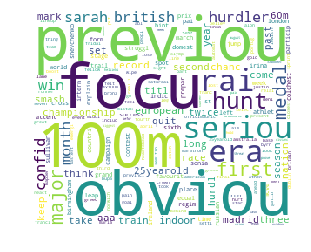

In [145]:
#TASK 4: 
#For clustering cases (Euclidean distance and the other similarity measure), visualize the cluster centres using Tag cloud using Python package WordCloud.

column = ['claxton']
df = pd.read_csv('bbcsport_terms.csv', usecols=column)

print(df)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=300,
                          height=250).generate(' '.join(df['claxton']))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#I couldn't think of any new idea how to plot the 5 cluster centers or even the internet doesn't provide me an precise example to formulate the code.
#For my own perspective, this is the closes I found using WordCloud.

In [146]:
#TASK 5: Dimensionality Reduction using PCA

#Executes the PCA then captured the variance corresponding to latent dimensionality growth.

#normalize the original data
Xnorm = scale(X)

#perform PCA using sklearn PCA implementation

pca = PCA(n_components=4613)
pca.fit(Xnorm)



PCA(copy=True, iterated_power='auto', n_components=4613, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [147]:
#The amount of variance that each principal components explains.
variance = pca.explained_variance_ratio_
print(variance)

[1.50890250e-02 1.28848532e-02 1.16306533e-02 1.00904774e-02
 9.56751519e-03 8.72552714e-03 8.52878334e-03 8.18103712e-03
 7.68505624e-03 7.25113952e-03 7.16023328e-03 6.49157415e-03
 6.42773699e-03 6.32654380e-03 6.15030742e-03 5.70733352e-03
 5.64359575e-03 5.50992108e-03 5.46076488e-03 5.36609265e-03
 5.23770926e-03 4.87330836e-03 4.84097905e-03 4.73872543e-03
 4.58494106e-03 4.52491151e-03 4.43956329e-03 4.37281752e-03
 4.31263105e-03 4.25796335e-03 4.23526993e-03 4.05756006e-03
 3.99890678e-03 3.98526123e-03 3.93518029e-03 3.90002659e-03
 3.85344921e-03 3.82305806e-03 3.78408651e-03 3.76097742e-03
 3.67592833e-03 3.64108989e-03 3.61984112e-03 3.60020149e-03
 3.53944636e-03 3.49980399e-03 3.44410000e-03 3.43224279e-03
 3.39606158e-03 3.38236849e-03 3.37092685e-03 3.34168215e-03
 3.29034410e-03 3.28949108e-03 3.27134585e-03 3.24153061e-03
 3.21682052e-03 3.18894254e-03 3.14741255e-03 3.13414554e-03
 3.11473970e-03 3.09489633e-03 3.07719035e-03 3.05038193e-03
 3.03872549e-03 3.028493

[ 1.51  2.8   3.96  4.97  5.93  6.8   7.65  8.47  9.24  9.97 10.69 11.34
 11.98 12.61 13.23 13.8  14.36 14.91 15.46 16.   16.52 17.01 17.49 17.96
 18.42 18.87 19.31 19.75 20.18 20.61 21.03 21.44 21.84 22.24 22.63 23.02
 23.41 23.79 24.17 24.55 24.92 25.28 25.64 26.   26.35 26.7  27.04 27.38
 27.72 28.06 28.4  28.73 29.06 29.39 29.72 30.04 30.36 30.68 30.99 31.3
 31.61 31.92 32.23 32.54 32.84 33.14 33.44 33.74 34.04 34.34 34.63 34.92
 35.21 35.5  35.79 36.07 36.35 36.63 36.91 37.19 37.47 37.74 38.01 38.28
 38.55 38.82 39.08 39.34 39.6  39.86 40.12 40.38 40.64 40.89 41.14 41.39
 41.64 41.89 42.14 42.39 42.63 42.87 43.11 43.35 43.59 43.83 44.07 44.31
 44.55 44.78 45.01 45.24 45.47 45.7  45.93 46.16 46.39 46.61 46.83 47.05
 47.27 47.49 47.71 47.93 48.15 48.36 48.57 48.78 48.99 49.2  49.41 49.62
 49.83 50.04 50.25 50.46 50.67 50.88 51.08 51.28 51.48 51.68 51.88 52.08
 52.28 52.48 52.68 52.87 53.06 53.25 53.44 53.63 53.82 54.01 54.2  54.39
 54.58 54.77 54.96 55.15 55.34 55.52 55.7  55.88 56.

Text(0,0.5,'Variance captured')

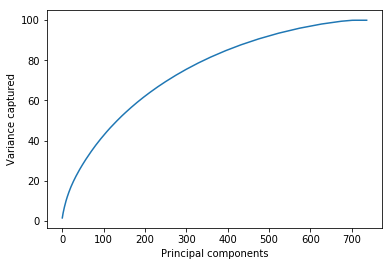

In [148]:
#Cumulative Variance explains
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var)
plt.plot(var)
plt.xlabel("Principal components")
plt.ylabel("Variance captured")

In [149]:
#The above line graph illustrates the variance captured from starting point of principal component 0 and variance 0.5. 

pca = PCA(n_components=50)
Zred = pca.fit_transform(Xnorm)
print(Zred.shape)

(737, 50)


In [150]:
comp95 = var[var<=95]
print("95% variance:  {}".format(len(comp95)))

comp98 = var[var<=98]
print("98% variance:  {}".format(len(comp98)))


95% variance:  554
98% variance:  626
